In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import RobustScaler, StandardScaler
from datetime import datetime
import math

from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RepeatedKFold, learning_curve
from sklearn.metrics import accuracy_score, f1_score, r2_score, precision_score, recall_score, classification_report, confusion_matrix
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

In [25]:
df = pd.read_csv('../raw_data/real_estate.csv')

In [26]:
df.drop('No', inplace=True, axis=1)

df.rename(columns={
    "X1 transaction date": "transaction_date",
    "X2 house age": "house_age",
    "X3 distance to the nearest MRT station": "distance_to_mrt",
    "X4 number of convenience stores": "num_convenience_stores",
    "X5 latitude": "latitude",
    "X6 longitude": "longitude",
    "Y house price of unit area": "price_per_unit_area"
}, inplace=True)

In [27]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=1)

print("Train data size:",len(train_data))
print("Test data size:",len(test_data))

Train data size: 331
Test data size: 83


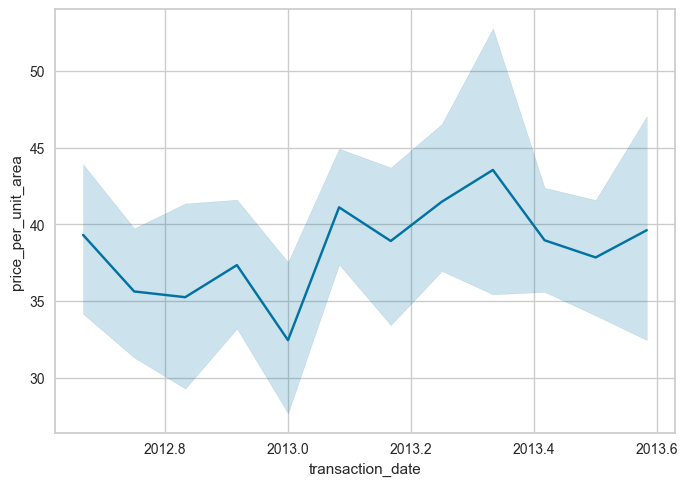

In [29]:
# transaction date Vs. house price of unit area
sns.lineplot(data=train_data, x="transaction_date", y="price_per_unit_area")
plt.show()

<Axes: xlabel='house_age', ylabel='price_per_unit_area'>

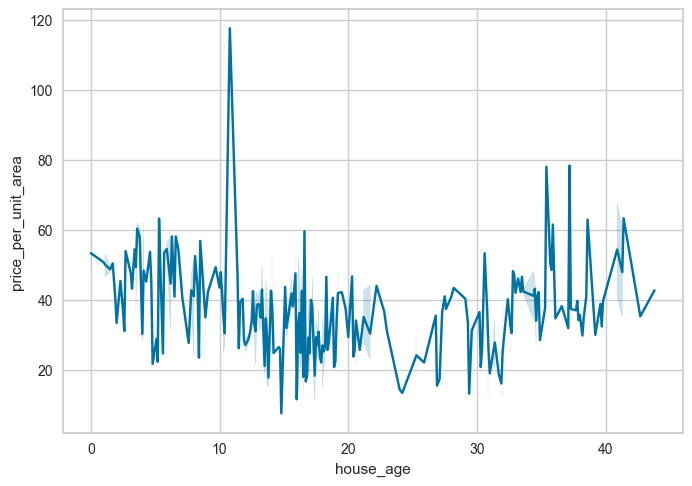

In [ ]:
# house age Vs.house price of unit area
sns.lineplot(data=train_data, x="house_age", y="price_per_unit_area")
plt.show()

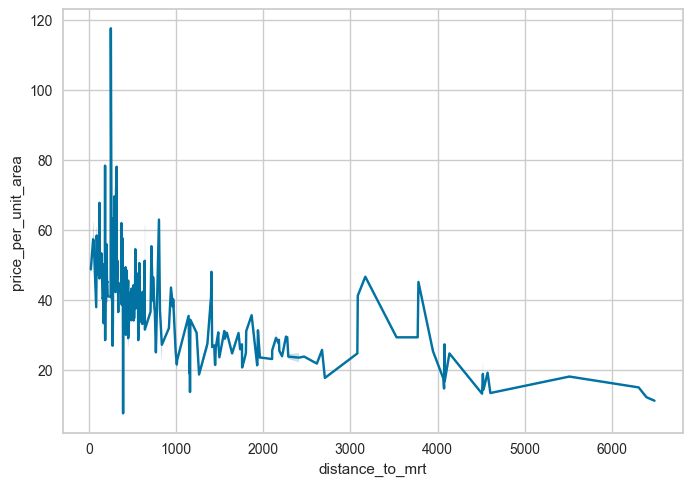

In [30]:
# distance to the nearest MRT station Vs. house price of unit area
sns.lineplot(data=train_data, x="distance_to_mrt", y="price_per_unit_area")
plt.show()

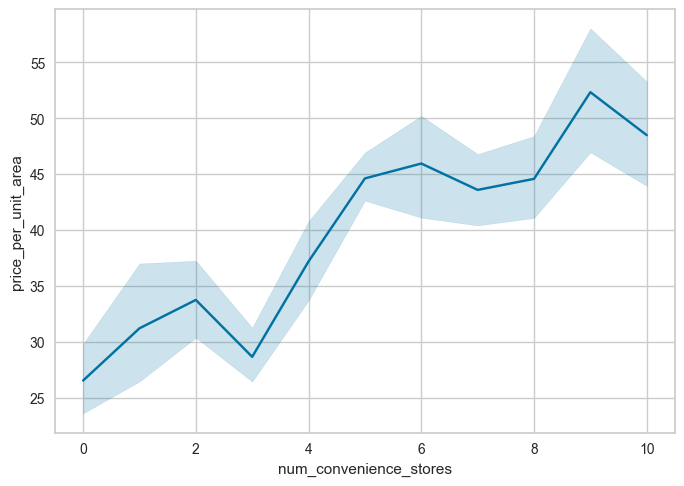

In [19]:
# number of convenience stores Vs. house price of unit area
sns.lineplot(data=train_data, x="num_convenience_stores", y="price_per_unit_area")
plt.show()

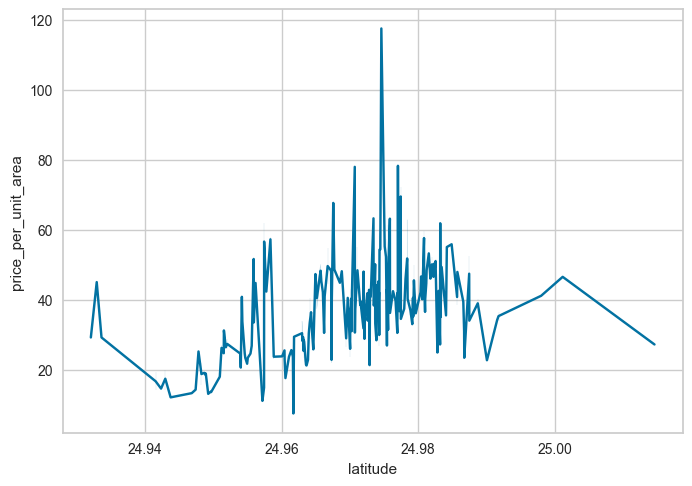

In [31]:
# latitude Vs. house price of unit area
sns.lineplot(data=train_data, x="latitude", y="price_per_unit_area")
plt.show()

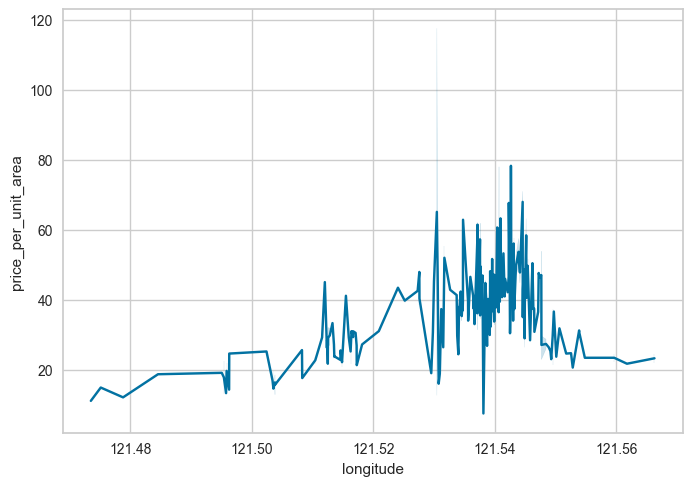

In [23]:
# longitude Vs. house price of unit area
sns.lineplot(data=train_data, x="longitude", y="price_per_unit_area")
plt.show()

In [33]:
numeric_train = train_data
correlation = numeric_train.corr()
correlation[['price_per_unit_area']].sort_values(['price_per_unit_area'], ascending=False)

,price_per_unit_area
price_per_unit_area,1.000000
num_convenience_stores,0.560355
latitude,0.506349
longitude,0.487869
transaction_date,0.074428
house_age,-0.204193
distance_to_mrt,-0.652540


<Axes: >

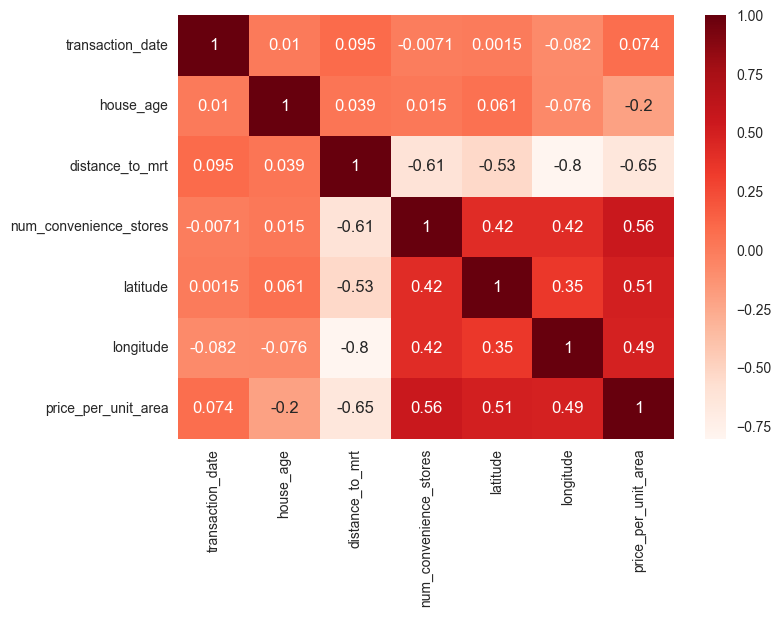

In [36]:
# Plotting correlation heatmap
corr = train_data.corr()
sns.heatmap(corr, cmap = 'Reds', annot= True)

In [37]:
# 4. Split features and target
X = df.drop(columns=["price_per_unit_area"])
y = df["price_per_unit_area"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [38]:
scaler = StandardScaler()

In [39]:
X_train_scaled = scaler.fit_transform(X_train)

In [40]:
# 7. Model training
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [41]:
y_pred = model.predict(X_train_scaled)

r2_train_poly = r2_score(y_train, y_pred)
mse_train_poly = mean_squared_error(y_train, y_pred)
rmse_train_poly = np.sqrt(mse_train_poly)
mae_train_poly = mean_absolute_error(y_train, y_pred)

print('Training:')
print('R2: ',r2_train_poly)
print('MSE: ',mse_train_poly)
print('RMSE: ',rmse_train_poly)
print('MAE: ',mae_train_poly)


Training:
R2:  0.5505948894557308
MSE:  85.50448723420612
RMSE:  9.24686364310657
MAE:  6.417912150307426


In [42]:
# testing evaluation:

X_test_scaled = scaler.fit_transform(X_test)

In [43]:
model.fit(X_test_scaled, y_test)

LinearRegression()

In [44]:
y_test_pred = model.predict(X_test_scaled)

r2_test_poly = r2_score(y_test, y_test_pred)
mse_test_poly = mean_squared_error(y_test, y_test_pred)
rmse_test_poly = np.sqrt(mse_train_poly)
mae_test_poly = mean_absolute_error(y_test, y_test_pred)

print('Testing:')
print('R2: ',r2_test_poly)
print('MSE: ',mse_test_poly)
print('RMSE: ',rmse_test_poly)
print('MAE: ',mae_test_poly)

Testing:
R2:  0.7482450637617599
MSE:  38.212888127137916
RMSE:  9.24686364310657
MAE:  4.886468953751042


In [45]:
pd.DataFrame({'Validation':  [r2_test_poly, mse_test_poly, rmse_test_poly, mae_test_poly],
               'Training': [r2_train_poly, mse_train_poly, rmse_train_poly, mae_train_poly],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

,Validation,Training
R2,0.748245,0.550595
MSE,38.212888,85.504487
RMSE,9.246864,9.246864
MAE,4.886469,6.417912


In [46]:
# Lasso Regression

model_lasso = Lasso(alpha=0.1)

In [47]:
model_lasso.fit(X_train_scaled, y_train)

y_lasso_pred = model_lasso.predict(X_train_scaled)

lasso_r2_train_poly = r2_score(y_train, y_lasso_pred)
lasso_mse_train_poly = mean_squared_error(y_train, y_lasso_pred)
lasso_rmse_train_poly = np.sqrt(mse_train_poly)
lasso_mae_train_poly = mean_absolute_error(y_train, y_lasso_pred)

print('Training:')
print('R2: ',lasso_r2_train_poly)
print('MSE: ',lasso_mse_train_poly)
print('RMSE: ',lasso_rmse_train_poly)
print('MAE: ',lasso_mae_train_poly)

Training:
R2:  0.5499284098061948
MSE:  85.6312926472923
RMSE:  9.24686364310657
MAE:  6.4428533380731405


In [48]:
y_lasso_test_pred = model_lasso.predict(X_test_scaled)

lasso_r2_test_poly = r2_score(y_test, y_lasso_test_pred)
lasso_mse_test_poly = mean_squared_error(y_test, y_lasso_test_pred)
lasso_rmse_test_poly = np.sqrt(mse_train_poly)
lasso_mae_test_poly = mean_absolute_error(y_test, y_lasso_test_pred)

print('Testing:')
print('R2: ',lasso_r2_test_poly)
print('MSE: ',lasso_mse_test_poly)
print('RMSE: ',lasso_rmse_test_poly)
print('MAE: ',lasso_mae_test_poly)

Testing:
R2:  0.6377265653005031
MSE:  54.98805480622438
RMSE:  9.24686364310657
MAE:  5.96631425325541


In [49]:
pd.DataFrame({'Validation':  [lasso_r2_test_poly, lasso_mse_test_poly, lasso_rmse_test_poly, lasso_mae_test_poly],
               'Training': [lasso_r2_train_poly, lasso_mse_train_poly, lasso_rmse_train_poly, lasso_mae_train_poly],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

,Validation,Training
R2,0.637727,0.549928
MSE,54.988055,85.631293
RMSE,9.246864,9.246864
MAE,5.966314,6.442853


In [50]:
# Dumping the scaler and model
import pickle
pickle.dump(model_lasso, open('../ai_model/new_lasso_model.pkl','wb'))

pickle.dump(scaler, open('../ai_model/new_scaler.pkl','wb'))

In [ ]:
# API call out

from pydantic import BaseModel

class HouseData(BaseModel):
    # transaction_date: float
    transaction_year: int
    transaction_month: int
    house_age: float
    distance_to_mrt: float
    num_convenience_stores: int
    latitude: float
    longitude: float

request_data ={
#   "transaction_date": 2013.25,
"transaction_year": 2013,
"transaction_month": 4,
  "house_age": 13.0,
  "distance_to_mrt": 500.0,
  "num_convenience_stores": 5,
  "latitude": 24.976,
  "longitude": 121.539
}

data = HouseData(**request_data)

transaction_date = data.transaction_year + (data.transaction_month - 1) / 12

model_corr_df = {
    "transaction_date": transaction_date,
    "house_age": data.house_age,
    "distance_to_mrt": data.distance_to_mrt,
    "num_convenience_stores": data.num_convenience_stores,
    "latitude": data.latitude,
    "longitude": data.longitude
}

input_df = pd.DataFrame([model_corr_df])

with open("../ai_model/new_lasso_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("../ai_model/new_scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

input_scaled = scaler.transform(input_df)

prediction = model.predict(input_scaled)

print(prediction[0])

47.06435692150595
